In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Load Data: Create Seurat Object

In [2]:
install.packages("Seurat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘lazyeval’, ‘crosstalk’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’




In [ ]:
library(dplyr)
library(Seurat)
library(patchwork)

pbmc.data <- Read10X(data.dir = "/content/drive/MyDrive/2024Fall/Exploratory_Data_Visualization/Community_Contribution/filtered_gene_bc_matrices/hg19")

pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

In [10]:
pbmc

An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)
 1 layer present: counts

In [15]:
head(pbmc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACATACAACCAC-1,pbmc3k,2419,779
AAACATTGAGCTAC-1,pbmc3k,4903,1352
AAACATTGATCAGC-1,pbmc3k,3147,1129
AAACCGTGCTTCCG-1,pbmc3k,2639,960
AAACCGTGTATGCG-1,pbmc3k,980,521
AAACGCACTGGTAC-1,pbmc3k,2163,781


In [16]:
head(rownames(pbmc))

[1] "AL627309.1"    "AP006222.2"    "RP11-206L10.2" "RP11-206L10.9"
[5] "LINC00115"     "NOC2L"

# Quality Control

In [17]:
pbmc@meta.data["percent.mt"] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


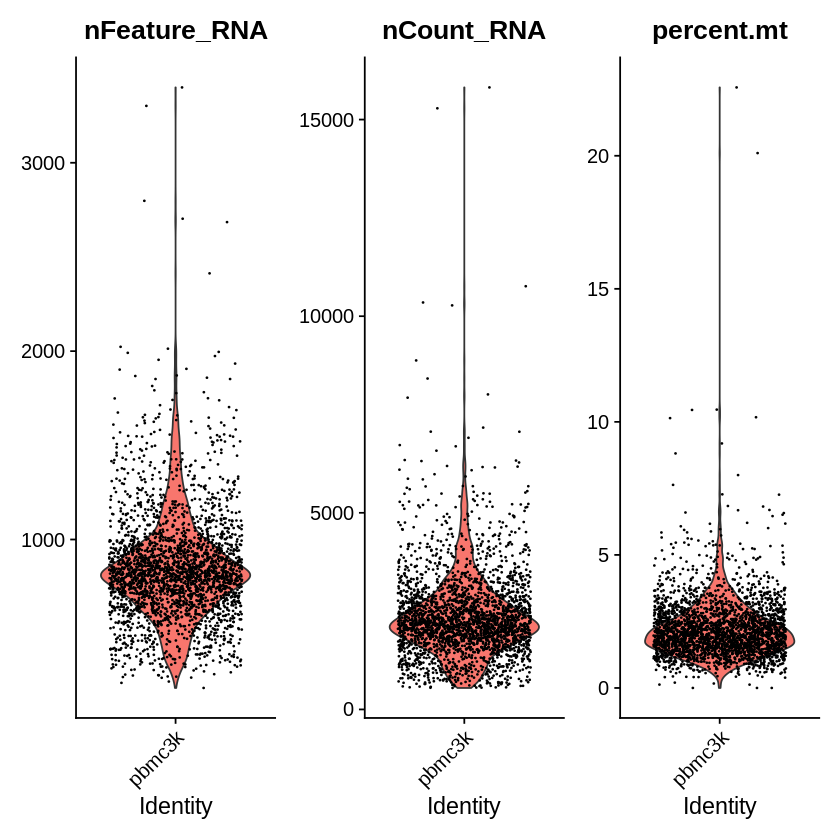

In [18]:
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [19]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 10)

#Normalization

In [20]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



#Highly Variable Genes

In [23]:
library(ggplot2)

In [ ]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

In [26]:
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

When using repel, set xnudge and ynudge to 0 for optimal results



Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


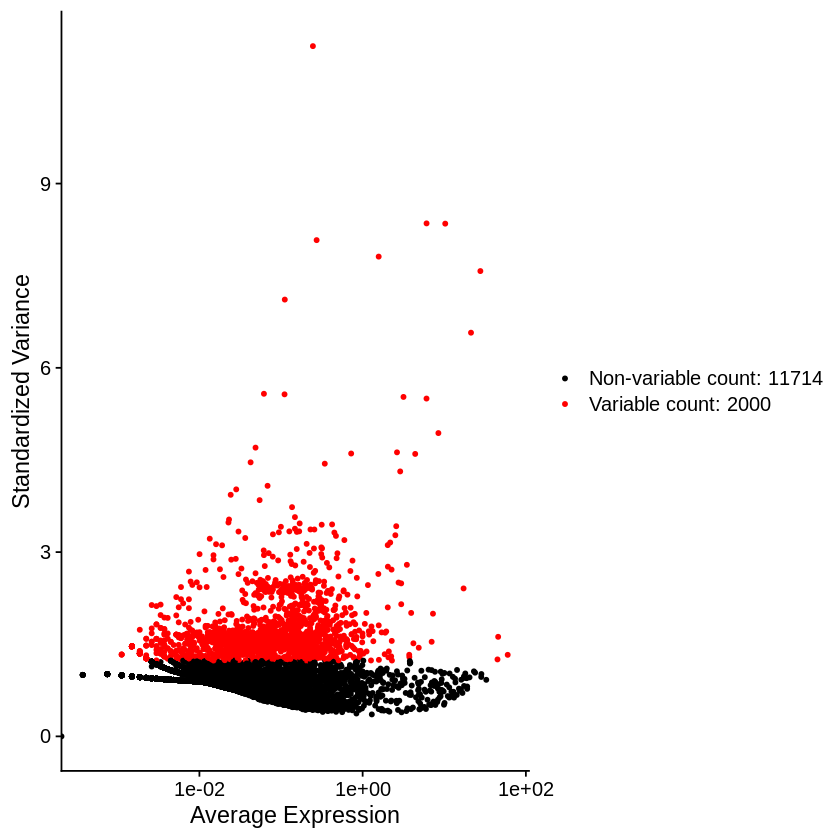

In [27]:
plot1

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


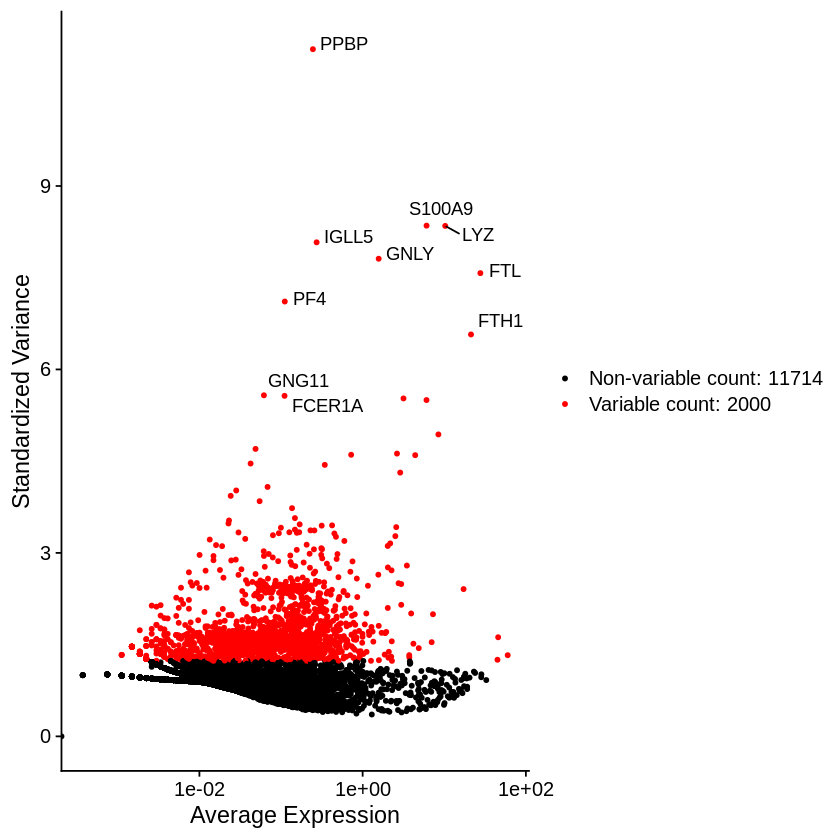

In [28]:
plot2

# Scale the data

In [30]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



# PCA

In [31]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CTSW, GZMM, STK17A 
	   CD247, CCL5, GIMAP5, AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A 
	   GZMK, MYC, GIMAP7, BEX2, ETS1, LDLRAP1, ZAP70, LYAR, NKG7, KLRG1 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DQA2, HLA-DMA, CD37, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, CST7, PRF1, GZMA, GZMB, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   GZMH, CCL4, FCGR3A, CCL5, GZMM, CD247, XCL2, CLIC3, AKR1C3, SRGN 
	   HOPX, S100A4, CTSC, TTC38, ANXA1, IGFBP7, ID2, IL32, XCL1, ACTB 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, CD74, HLA-

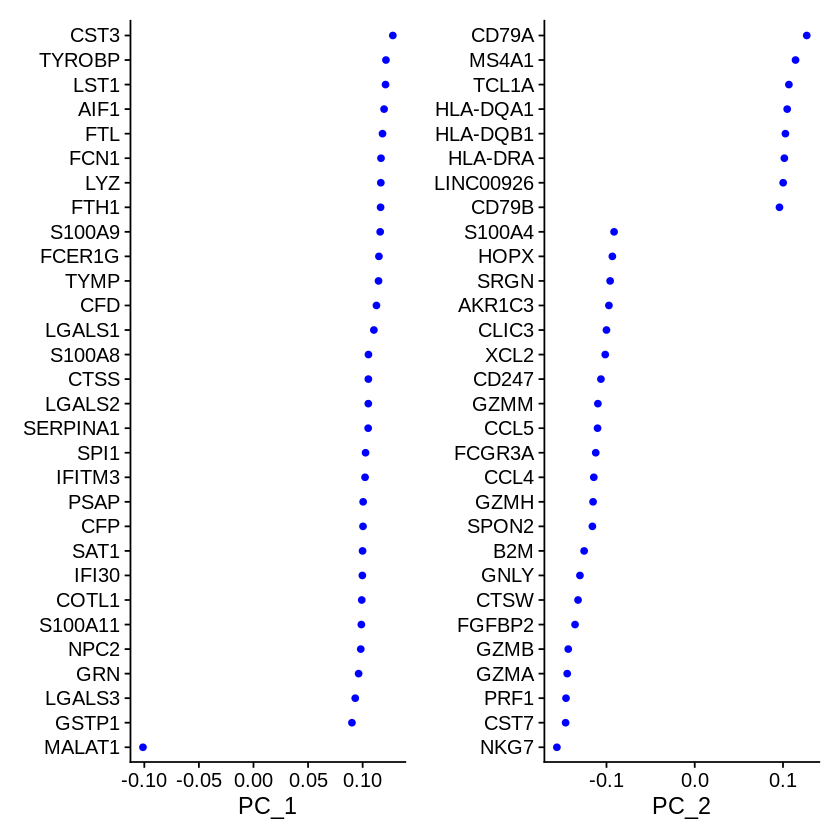

In [32]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

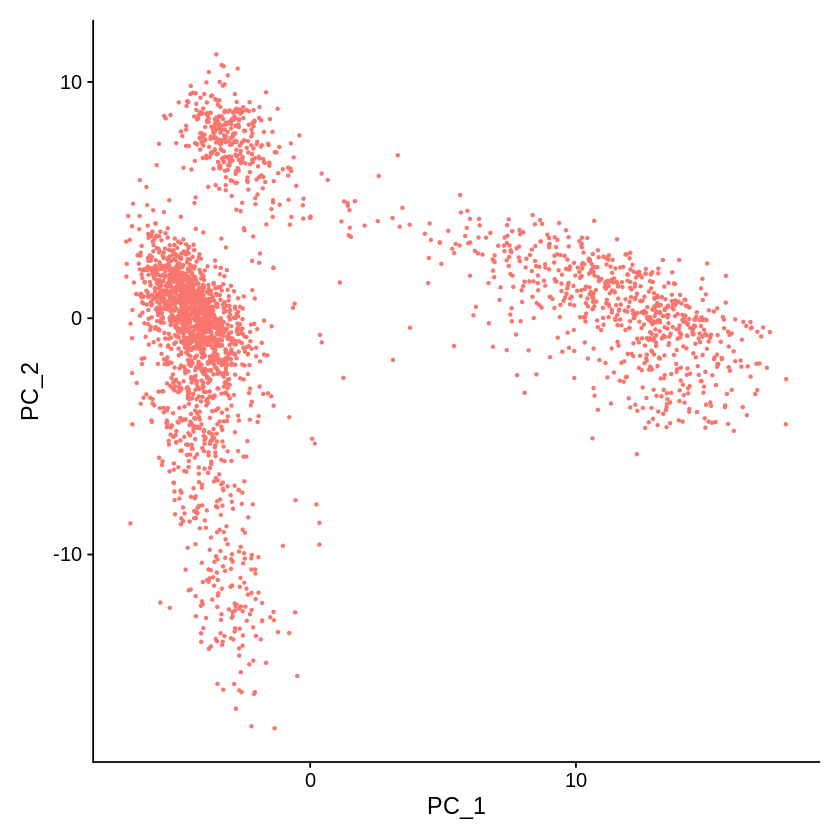

In [33]:
DimPlot(pbmc, reduction = "pca") + NoLegend()

#Clustering

In [35]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)

Computing nearest neighbor graph

Computing SNN



In [36]:
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:06:50 UMAP embedding parameters a = 0.9922 b = 1.112

23:06:50 Read 2689 rows and found 10 numeric columns

23:06:50 Using Annoy for neighbor search, n_neighbors = 30

23:06:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:06:50 Writing NN index file to temp file /tmp/RtmpmJdty2/file5a027f89a80

23:06:50 Searching Annoy index using 1 thread, search_k = 3000

23:06:51 Annoy recall = 100%

23:06:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

## Louvain

In [37]:
#Louvain
pbmc <- FindClusters(pbmc, resolution = 1.0, algorithm = 1, method = "igraph")
pbmc$Louvain_Clusters <- Idents(pbmc)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2689
Number of edges: 97539

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8080
Number of communities: 11
Elapsed time: 0 seconds


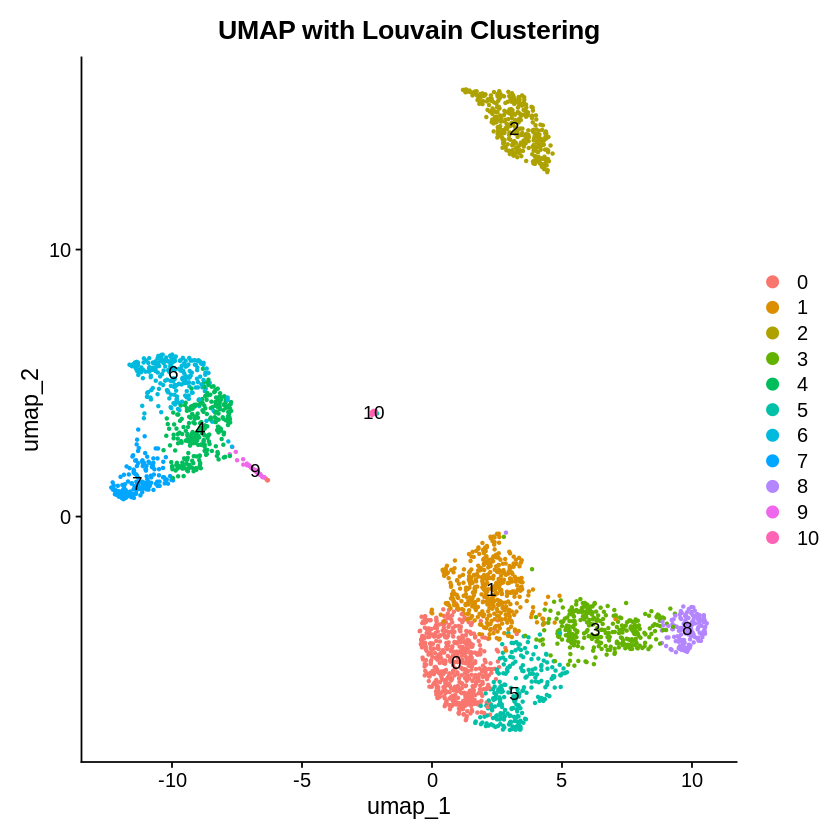

In [38]:
DimPlot(pbmc, reduction = "umap", group.by = "Louvain_Clusters", label = TRUE) +
  ggtitle("UMAP with Louvain Clustering")

#Find markers

In [39]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(pbmc, ident.1 = 2)
head(cluster2.markers, n = 5)

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD79A,0.000000e+00,6.896399,0.937,0.041,0.000000e+00
MS4A1,0.000000e+00,5.745231,0.857,0.052,0.000000e+00
CD79B,1.511412e-277,4.610356,0.914,0.141,2.072751e-273
LINC00926,9.637739e-277,7.402244,0.562,0.009,1.321720e-272
TCL1A,1.477380e-275,6.684451,0.622,0.022,2.026079e-271


In [40]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5.markers <- FindMarkers(pbmc, ident.1 = 5, ident.2 = c(0, 3))
head(cluster5.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD53,7.630857e-11,-0.6997896,0.282,0.589,1.046496e-06
RAP1B,1.424411e-10,-1.2030421,0.171,0.424,1.953437e-06
MYL12B,3.291244e-09,-0.5039004,0.470,0.763,4.513612e-05
HLA-C,1.915554e-08,-0.4058711,0.953,0.995,2.626991e-04
MALAT1,2.302650e-08,0.4216462,1.000,1.000,3.157854e-04


In [41]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE)
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.824077e-106,1.154016,0.960,0.601,5.244339e-102,0,LDHB
5.204146e-85,2.151598,0.494,0.121,7.136966e-81,0,CCR7
3.628021e-52,2.008002,0.378,0.110,4.975468e-48,0,LEF1
1.478116e-51,1.832956,0.385,0.115,2.027089e-47,0,PRKCQ-AS1
1.559928e-50,2.178718,0.328,0.085,2.139286e-46,0,MAL
2.933689e-46,2.522611,0.233,0.045,4.023261e-42,0,FHIT
1.623113e-44,1.089554,0.681,0.366,2.225937e-40,0,NOSIP
2.758504e-42,1.411663,0.481,0.193,3.783012e-38,0,PIK3IP1
3.690150e-40,1.305035,0.445,0.179,5.060671e-36,0,TCF7


In [42]:
cluster0.markers <- FindMarkers(pbmc, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)

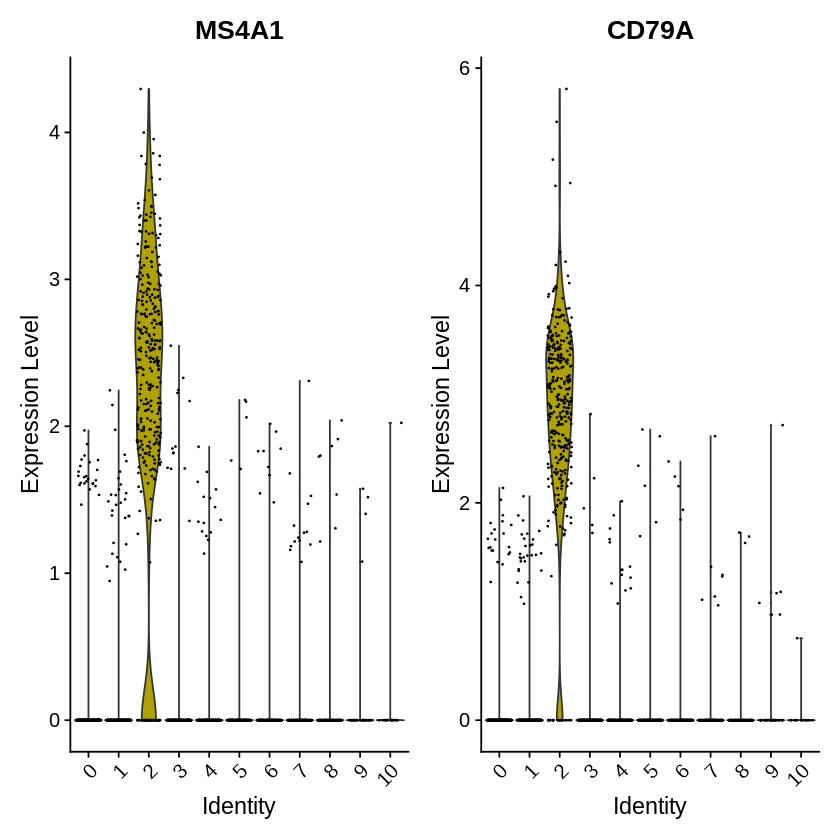

In [43]:
VlnPlot(pbmc, features = c("MS4A1", "CD79A"))